# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import logging

import core.config as cconfig
import core.dataflow_model.incremental_single_name_model_evaluator as ime
import core.dataflow_model.model_evaluator as modeval
import core.dataflow_model.model_plotter as modplot
import core.dataflow_model.stats_computer as csc
import core.dataflow_model.utils as cdmu
import core.plotting as cplot
import core.statistics as cstati
import helpers.dbg as dbg
import helpers.printing as hprint

/app/amp/core/dataflow_model/utils.py:31: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dbg.init_logger(verbosity=logging.INFO)
# dbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

# _LOG.info("%s", env.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-b23fe88d-4a21-4d78-a1fa-38635532c9d1.json'


# Load features

In [ ]:
feat_iter = cdmu.yield_experiment_artifacts(
    src_dir="",
    file_name="result_bundle.v2_0.pkl",
    load_rb_kwargs={},
)

In [ ]:
key, artifact = next(feat_iter)
display("key=%s", key)
features = artifact.result_df

In [ ]:
features.head()

# Cross-sectional feature analysis

In [ ]:
cplot.plot_heatmap(
    features.corr(),
    mode="clustermap",
    figsize=(20, 20)
)

In [ ]:
cplot.plot_effective_correlation_rank(features)

In [ ]:
cplot.plot_projection(features.resample("B").sum(min_count=1))

In [ ]:
sc = csc.StatsComputer()

In [ ]:
features.apply(sc.compute_summary_stats).round(3)

# Single feature analysis

In [ ]:
feature = ""

In [ ]:
cplot.plot_qq(features[feature])

In [ ]:
cplot.plot_histograms_and_lagged_scatterplot(
    features[feature],
    lag=1,
    figsize=(20, 20)
)

In [ ]:
cplot.plot_time_series_by_period(
    features[feature],
    "hour",
)

In [5]:
import numpy as np
import pandas as pd

import core.features as cfeat

In [6]:
m = [[1, 0.9, 0, -1], [-1, -1, 0, 0], [0, 0.1, 1, 0], [0, 0, -1, 1]]

In [44]:
mdf = pd.DataFrame(m, columns=["f1", "f2", "f3", "f4"])

In [51]:
mdf.std()

f1    1.0
f2    1.0
f3    1.0
f4    1.0
dtype: float64

In [72]:
mdf = mdf / np.sqrt((mdf ** 2).sum())

In [90]:
mdf.std()

f1    0.57735
f2    0.57735
f3    0.57735
f4    0.57735
dtype: float64

In [88]:
mdf["f1"].std()

0.5773502691896258

In [75]:
cfeat.compute_correlations(mdf).round(2)

,f1,f2,f3,f4
0,-0.47,-0.47,-0.15,0.38
1,0.18,0.16,-0.45,0.24
2,-0.04,-0.09,-0.17,-0.23
3,0.00,-0.00,0.00,0.00


In [76]:
cfeat.compute_grassmann_distance(mdf, 1, ["f1", "f2"])

,canonical_corr,principal_angles
0,0.932189,0.370382


In [40]:
cfeat.compute_grassmann_distance(mdf, 1, ["f1"])

,canonical_corr,principal_angles
0,0.93235,0.369937


In [37]:
cfeat.compute_grassmann_distance(mdf, 1, ["f1", "f2", "f3"]).round(3)

,canonical_corr,principal_angles
0,0.939,0.35


In [36]:
np.linalg.det(m)

2.2204460492503243e-17

In [83]:
df = mdf

In [91]:
import core.artificial_signal_generators as casg

In [93]:
mvn = casg.MultivariateNormalProcess()

In [299]:
mvn.set_cov_from_inv_wishart_draw(dim=10, seed=343)

In [300]:
df = mvn.generate_sample(
    date_range_kwargs={
        "start": "2001-01-01",
        "freq": "T",
        "periods": 1000
    },
    seed=708
)

In [301]:
df

,0,1,2,3,4,5,6,7,8,9
2001-01-01 00:00:00,0.552930,-0.140395,-0.768406,0.360943,0.950846,-0.075900,0.485190,0.630530,-0.784785,-0.759954
2001-01-01 00:01:00,0.023405,-1.558245,-0.768031,0.016659,0.995762,0.640415,-0.386277,1.335741,-0.529976,-0.629310
2001-01-01 00:02:00,1.706860,1.050048,-1.347053,-1.441680,1.947816,0.524358,0.985524,-0.029700,-2.168863,-0.786847
2001-01-01 00:03:00,-0.381375,1.975823,1.920344,0.213451,-1.880553,-1.745073,0.001220,-2.172288,2.017248,1.041802
2001-01-01 00:04:00,-1.131588,0.409661,2.806410,0.673805,-1.353540,-0.793037,-1.205346,-1.215541,2.173553,0.944784
...,...,...,...,...,...,...,...,...,...,...
2001-01-01 16:35:00,0.778579,-1.146051,-0.052942,-0.960761,0.676834,0.367474,-0.711066,0.340247,-1.236358,0.252681
2001-01-01 16:36:00,0.776088,0.609753,-0.453852,-0.426921,1.938214,-0.156608,-0.519685,-0.157601,-0.484977,-0.164357
2001-01-01 16:37:00,-1.553455,-0.438012,-0.282492,0.930771,1.042358,0.391731,-0.512716,0.421203,0.202743,0.365885
2001-01-01 16:38:00,0.812710,0.411560,-1.131870,-0.987553,2.347015,0.933768,0.561770,0.234460,-2.116175,-0.512936


In [586]:
cfeat.compute_normalized_statistical_leverage_scores(df, demean_cols=True, normalize_cols=True).round(3)

,0,1,2,3,4,5,6,7,8,9
proj_dim,,,,,,,,,,
1,0.102,0.030,0.106,0.108,0.132,0.115,0.025,0.119,0.139,0.125
2,0.146,0.169,0.101,0.130,0.081,0.083,0.050,0.096,0.080,0.065
3,0.099,0.210,0.077,0.089,0.056,0.056,0.244,0.067,0.054,0.047
4,0.087,0.168,0.105,0.067,0.053,0.144,0.184,0.054,0.048,0.089
5,0.071,0.135,0.143,0.091,0.048,0.116,0.148,0.049,0.046,0.153
6,0.059,0.120,0.119,0.082,0.049,0.138,0.124,0.129,0.041,0.140
7,0.066,0.134,0.137,0.079,0.048,0.126,0.138,0.111,0.036,0.126
8,0.059,0.124,0.120,0.070,0.123,0.117,0.125,0.117,0.033,0.113
9,0.096,0.110,0.109,0.109,0.110,0.106,0.111,0.107,0.035,0.107


In [589]:
cfeat.compute_normalized_principal_loadings(df, normalize_cols=True).round(3)

,0,1,2,3,4,5,6,7,8,9
principal_direction,,,,,,,,,,
1,-0.828,0.446,0.841,0.851,-0.939,-0.878,-0.408,-0.895,0.967,0.917
2,-0.514,-0.661,-0.366,0.462,-0.205,0.266,0.320,0.319,0.175,0.077
3,0.088,-0.568,0.183,-0.080,0.091,0.057,-0.841,0.107,0.026,0.112
4,-0.121,0.108,0.231,-0.015,0.111,0.336,0.038,0.058,-0.091,0.246
5,0.021,0.010,0.215,0.172,0.065,0.036,0.013,0.069,0.079,-0.253
6,-0.008,0.076,-0.003,0.068,0.081,-0.175,-0.018,0.257,-0.042,0.098
7,0.102,-0.142,0.151,-0.074,-0.064,-0.073,0.145,0.020,-0.019,0.061
8,0.023,0.058,0.007,-0.027,-0.199,0.056,-0.043,0.098,-0.026,-0.035
9,0.117,0.001,-0.027,0.121,-0.012,0.029,-0.004,-0.031,-0.045,0.047


In [596]:
cfeat.compute_effective_rank(df / df.std(), np.inf)

1.490597804426909

[3.0555826007620097, 2.068750985372336, 1.4907725896366988]

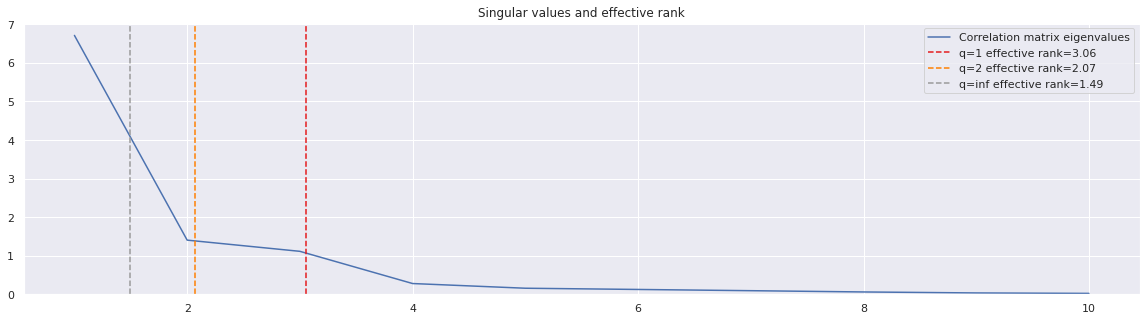

In [597]:
cplot.plot_effective_correlation_rank(df / df.std())

In [621]:
edf = cfeat.evaluate_col_selection(df, [8], normalize_cols=False)
display(edf)

distance              0.172949
proj_volume           1.963978
df_eff_rank           2.142966
proj_cols_eff_rank    1.000000
dtype: float64

In [620]:
edf = cfeat.evaluate_col_selection(df, [4], normalize_cols=False)
display(edf)

distance              0.223356
proj_volume           2.097711
df_eff_rank           2.142966
proj_cols_eff_rank    1.000000
dtype: float64

In [603]:
cfeat.select_cols_by_greedy_grassmann(df, 5, normalize_cols=False)

[8, 2, 1, 0, 4]

In [608]:
cfeat.select_cols_by_greedy_volume(df, 5, normalize_cols=False)

[4, 2, 1, 0, 8]

In [538]:
cfeat.compute_principal_grassmannian(df, 1)

,1
0,-0.013418
1,-0.014195
2,-0.032865
3,0.033907
4,0.033532
...,...
995,-0.014901
996,-0.015233
997,0.001380
998,-0.031163
